<div class="clearfix" style="padding: 10px; padding-left: 0px">
<img src="https://cloud.githubusercontent.com/assets/836375/4911394/dd819b7e-648c-11e4-8c6d-755b9d4d9ea3.png" width="150px" style="display: inline-block; margin-top: 5px;">
<a href="http://bit.ly/naturedevplus"><img src="https://cloud.githubusercontent.com/assets/836375/4916141/2732892e-64d6-11e4-980f-11afcf03ca31.png" width="150px" class="pull-right" style="display: inline-block; margin: 0px;"></a>
</div>

# Introduction

Welcome! You have just launched a live example of an IPython Notebook. The notebook is an open-source, interactive computing environment that lets you combine live code, narrative text, mathematics, plots and rich media in one document. Notebook documents provide a complete reproducible record of a computation and its results and can be shared with colleagues (through, for example, email, web-hosting services such as GitHub, Dropbox, and [nbviewer](http://nbviewer.ipython.org)).

You can edit anything in this temporary demonstration notebook, including the text you are reading. To see it full-screen, click on the 'Expand' icon in the lower right corner of the frame around this notebook. 

This notebook showcases some of IPython's capabilities for researchers.

This demonstration is hosted by [Rackspace](http://bit.ly/naturedevplus) and is running on its bare metal offering, [OnMetal](http://www.rackspace.com/cloud/servers/onmetal/). Try out these cloud services yourself through [Rackspace's developer+ page](http://bit.ly/naturedevplus).

## Basic Python code and plotting

The box below (known as a code cell) contains the Python code to plot $y=x^2$ over the range $[0,5]$. The blue comments preceded by `#` explain what the code does.

To run the code:

1. Click on the cell to select it.
2. Press `SHIFT+ENTER` on your keyboard or press the play button (<button class='fa fa-play icon-play btn btn-xs btn-default'></button>) in the toolbar above.

A full tutorial for using the notebook interface is available [here](http://nbviewer.ipython.org/github/ipython/ipython/blob/2.x/examples/Notebook/Index.ipynb).

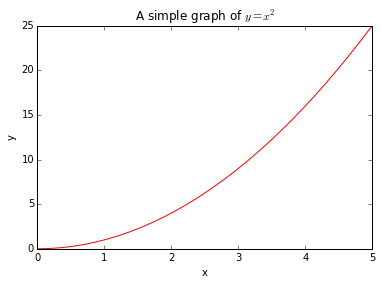

In [1]:
# Import matplotlib (plotting) and numpy (numerical arrays).
# This enables their use in the Notebook.
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np

# Create an array of 30 values for x equally spaced from 0 to 5. 
x = np.linspace(0, 5, 30)
y = x**2

# Plot y versus x
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x, y, color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('A simple graph of $y=x^2$');

Above, you should see a plot of $y=x^2$.

You can edit this code and re-run it. For example, try replacing `y = x**2` with `y=np.sin(x)`. For a list of valid functions, see the [NumPy Reference Manual](http://docs.scipy.org/doc/numpy/reference/routines.math.html). You can also update the plot title and axis labels.

Text in the plot as well as narrative text in the notebook can contain equations that are formatted using $\LaTeX$. To edit text written in $\LaTeX$, double click on the text or press `ENTER` when the text is selected.

## Interactive illustration of aliasing

Notebooks can also link code and data to user interfaces (such as sliders, checkboxes, dropdowns) that facilitate interactive exploration.

Aron Ahmadia (Coastal & Hydraulics Laboratory at the US Army Engineer Research and Development Center) and David Ketcheson (King Abdullah University of Science & Technology) created the following example to illustrate the perils of aliasing, which occurs when a rapidly-changing periodic signal is sampled too infrequently, and creates a false impression of the true frequency of the signal. 

Ketcheson explains:

> "As an undergraduate, I did some observational astronomy looking at variable stars.
> These are stars whose brightness oscillates, usually on a fairly regular basis. 
> Many published results claim to measure how quickly the star's brightness oscillates - 
> but actually report the oscillations at some multiple of the real answer, owing to
> insufficient observation and (as a result) aliasing."

This example shows how trying to reconstruct a simple sine wave signal from discrete measurements can fail. The sliders allow you to adjust the frequency of the underlying periodic sine wave signal (represented by `frequency`), and also how often the signal is sampled (represented by `grid_points`). Get it wrong, and a high-frequency sine wave is measured as a lower-frequency signal.

To see the effects of aliasing:

1. Run the next cell, then set the `grid_points` slider to `13`.
2. Move the `frequency` slider to values above `10`.
3. As the frequency increases, the measured signal (blue) has a lower frequency than the real one (red).

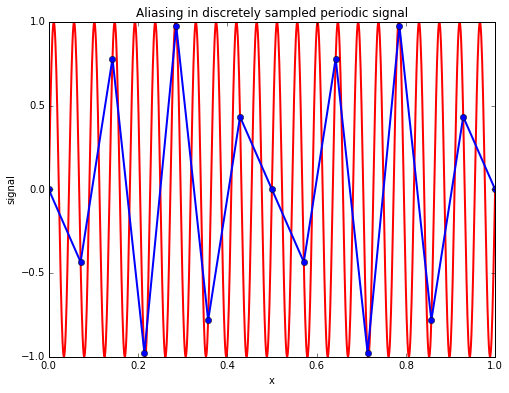

In [2]:
# Import matplotlib (plotting) and numpy (numerical arrays).
# This enables their use in the Notebook.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Import IPython's interact function which is used below to
# build the interactive widgets
from IPython.html.widgets import interact

def plot_sine(frequency=4.0, grid_points=12, plot_original=True):
    """
    Plot discrete samples of a sine wave on the interval ``[0, 1]``.
    """
    x = np.linspace(0, 1, grid_points + 2)
    y = np.sin(2 * frequency * np.pi * x)

    xf = np.linspace(0, 1, 1000)
    yf = np.sin(2 * frequency * np.pi * xf)

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlabel('x')
    ax.set_ylabel('signal')
    ax.set_title('Aliasing in discretely sampled periodic signal')

    if plot_original:
        ax.plot(xf, yf, color='red', linestyle='solid', linewidth=2)

    ax.plot(x,  y,  marker='o', linewidth=2)

# The interact function automatically builds a user interface for exploring the
# plot_sine function.
interact(plot_sine, frequency=(1.0, 22.0, 0.5), grid_points=(10, 16, 1), plot_original=True);

## Counting galaxies in the Hubble deep field

The notebook can utilize powerful Python libraries that span everything from statistics and machine learning to signal and image processing. This example uses the image-processing library [scikit-image](http://scikit-image.org/) to identify galaxies in an image of the sky provided by the Hubble Space Telescope using a blob feature detection algorithm (an approach known as the [determinant of Hessian](http://en.wikipedia.org/wiki/Blob_detection#The_determinant_of_the_Hessian) ).

After running the cell, you can play with the parameters of the detection algorithm to find galaxies of different sizes and prominences:

* The `max_sigma` parameter determines the maximum size of the objects that will be identified.
* The `threshold` parameter can be reduced to detect less prominent objects.

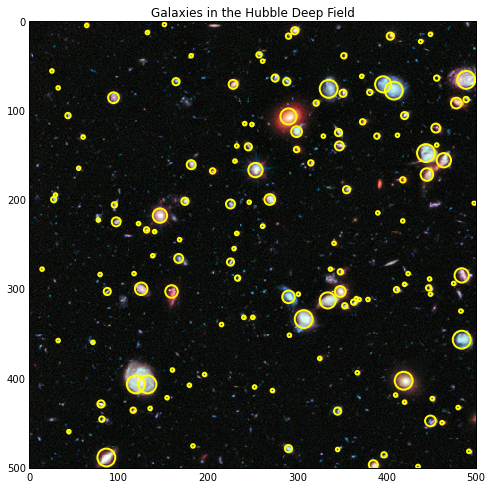

In [2]:
# Import matplotlib (plotting), skimage (image processing) and interact (user interfaces)
# This enables their use in the Notebook.
%matplotlib inline
from matplotlib import pyplot as plt

from skimage import data
from skimage.feature import blob_doh
from skimage.color import rgb2gray

from IPython.html.widgets import interact, fixed

# Extract the first 500px square of the Hubble Deep Field.
image = data.hubble_deep_field()[0:500, 0:500]
image_gray = rgb2gray(image)

def plot_blobs(max_sigma=30, threshold=0.1, gray=False):
    """
    Plot the image and the blobs that have been found.
    """
    blobs = blob_doh(image_gray, max_sigma=max_sigma, threshold=threshold)
    
    fig, ax = plt.subplots(figsize=(8,8))
    ax.set_title('Galaxies in the Hubble Deep Field')
    
    if gray:
        ax.imshow(image_gray, interpolation='nearest', cmap='gray_r')
        circle_color = 'red'
    else:
        ax.imshow(image, interpolation='nearest')
        circle_color = 'yellow'
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=circle_color, linewidth=2, fill=False)
        ax.add_patch(c)

# Use interact to explore the galaxy detection algorithm.
interact(plot_blobs, max_sigma=(10, 40, 2), threshold=(0.005, 0.02, 0.001));

## Notebooks for academic publications

IPython notebooks are being distributed as supplementary materials in peer-reviewed academic publications to enable readers to reproduce the computational aspects of the work. Here are three prominent examples:

* Gross, A. M. *et al*., *[Multi-tiered genomic analysis of head and neck cancer ties TP53 mutation to 3p loss]( http://www.nature.com/ng/journal/v46/n9/full/ng.3051.html)*, *Nature Genet.* **46**, 939–943 (2014). (A GitHub repository with all the notebooks required to reproduce this analysis can be found [here](https://github.com/theandygross/TCGA/tree/master/Analysis_Notebooks#guide-to-running). The notebooks can be viewed directly [here](http://nbviewer.ipython.org/github/theandygross/TCGA/tree/master/Analysis_Notebooks/).
* Ragan-Kelley, B. *et al*., *[Collaborative cloud-enabled tools allow rapid, reproducible biological insights](http://www.nature.com/ismej/journal/v7/n3/full/ismej2012123a.html)*, *ISME* **7**, 461–464 (2013). [Supplementary notebook](http://nbviewer.ipython.org/gist/gregcaporaso/3693491/cloud_demo_complete.ipynb)
* Ding, T. & Schloss, T. D. *[Dynamics and associations of microbial community types across the human body](http://www.nature.com/nature/journal/v509/n7500/full/nature13178.html)*, *Nature* **509**, 357–360 (2014). [Supplementary notebook](http://nbviewer.ipython.org/gist/pschloss/9815766/notebook.ipynb)

A longer list of peer-reviewed publications that have supplementary notebooks can be found [here](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks#reproducible-academic-publications).


## Next steps

The IPython Project maintains a curated list of notebooks that provide examples of its use across a wide range of fields and topics. You can find these examples at [this gallery](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks).

Directions on how to install software to run the IPython notebook on your own computer can be found [here](http://ipython.org/install.html).

It is also possible to run a notebook in the cloud, without installing the software, using the following services:

* [Authorea](https://www.authorea.com/)
* [Sage Math Cloud](https://cloud.sagemath.com/)
* [Wakari](https://wakari.io/)

The notebook is being moved into a project called Jupyter, which aims to make the IPython software package more compatible with other languages, including Julia and R. Further information can be found on the [IPython](http://ipython.org/install.html) and [Jupyter](http://jupyter.org) websites.

<img src="https://raw.githubusercontent.com/jupyter/nature-demo/master/images/ipython-logo.png" width="250px" style="margin: 20px auto;">
<img src="https://raw.githubusercontent.com/jupyter/nature-demo/master/images/jupyter-logo.png" width="250px" style="margin: 20px auto;">

The IPython and Jupyter projects are sponsored by the Alfred P. Sloan Foundation, Rackspace, Google, Microsoft, the National Science Foundation and the Simons Foundation.

This demonstration was created with the help of: Kyle Kelley, Brian Granger, Fernando Perez, Matthias Bussonnier, Aron Ahmadia, David Ketcheson, Chris Ryan, Richard Van Noorden and Stéfan van der Walt.